1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

In [1]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy

Mounted at /content/drive


#Load data

In [2]:
# read data using Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/NMMH/week 02/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


## Data Analysis

In [3]:
#các thông tin của từng feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [4]:
print("Quantitative columns \n")
print(df.describe())
print()
print("Qualitative and Quantitative columns \n")
print(df.describe(include=[object, float]))

Quantitative columns 

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std 

<Axes: xlabel='target', ylabel='Count'>

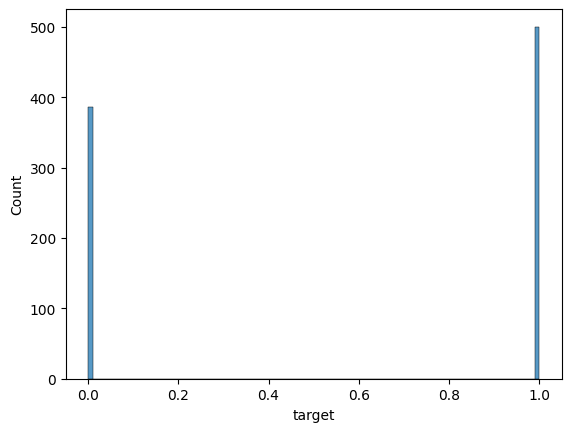

In [7]:
import seaborn as sns
sns.histplot(x="target", data=df, bins=100)

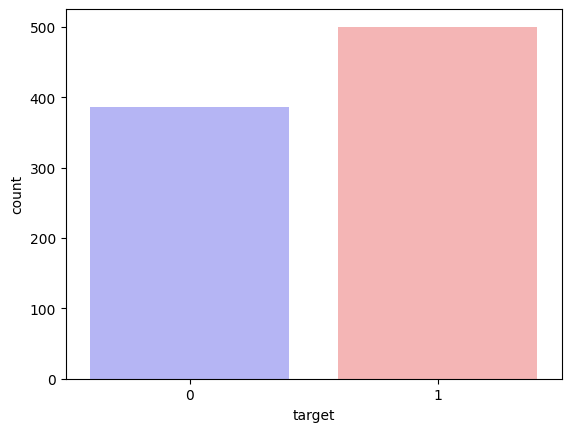

In [10]:
import matplotlib.pyplot as plt
sns.countplot(x="target", data=df, palette="bwr") # Thống kê cột 'y'
plt.show()

## Preprocessing

#1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    print(df.isnull().sum())
    print("Sample size:", len(df))
    df = df.dropna()
    print("Not null sample size:", len(df))

In [ ]:
df = preprocessing_data(df.copy())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Sample size: 886
Not null sample size: 886


## Feature Engineering

Do data của mình k có cái nào là object nên không cần normalize data

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [ ]:
# Correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.078459,-0.038434,0.337231,0.222152,0.187199,0.086401,-0.364585,0.125929,0.260906,-0.219664,0.271855,0.049096,-0.232576
sex,-0.078459,1.000000,0.013230,0.064870,-0.280802,0.123895,-0.241043,-0.096892,0.130696,0.152399,-0.009482,0.120516,0.212362,-0.283901
cp,-0.038434,0.013230,1.000000,0.063611,-0.157302,0.094775,0.047164,0.381308,-0.434926,-0.181597,0.142356,-0.283616,-0.253087,0.520575
trestbps,0.337231,0.064870,0.063611,1.000000,0.022509,0.157461,-0.106654,-0.082958,-0.006576,0.169383,-0.067141,0.176673,0.053659,-0.194818
chol,0.222152,-0.280802,-0.157302,0.022509,1.000000,-0.079892,0.006748,-0.050853,0.157342,0.061578,-0.001511,0.213909,0.151240,-0.093199
fbs,0.187199,0.123895,0.094775,0.157461,-0.079892,1.000000,-0.039141,-0.021372,-0.145109,-0.059736,-0.093437,0.204107,-0.113579,0.017736
restecg,0.086401,-0.241043,0.047164,-0.106654,0.006748,-0.039141,1.000000,0.088967,-0.079988,-0.050961,0.114417,-0.109777,-0.035165,0.143819
thalach,-0.364585,-0.096892,0.381308,-0.082958,-0.050853,-0.021372,0.088967,1.000000,-0.420237,-0.398322,0.463312,-0.298086,-0.128411,0.512224
exang,0.125929,0.130696,-0.434926,-0.006576,0.157342,-0.145109,-0.079988,-0.420237,1.000000,0.269824,-0.296775,0.219526,0.291320,-0.492947
oldpeak,0.260906,0.152399,-0.181597,0.169383,0.061578,-0.059736,-0.050961,-0.398322,0.269824,1.000000,-0.503280,0.287669,0.245363,-0.540943


<Axes: >

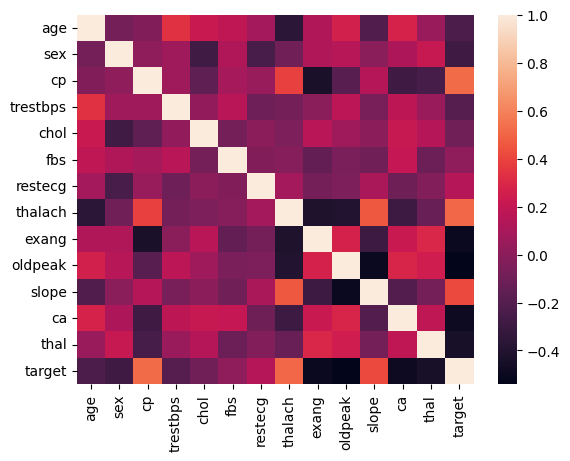

In [ ]:
# Heatmap
import seaborn as sns
sns.heatmap(df.corr())

#3. Divide the dataset into 2 training and test sets

In [ ]:
# Split X, y from dataset
columns = df.columns.tolist()             # Columns name
columns.remove('target')           # Remove y label (column charges in this case)
feature_data = df[columns]                          # X 
target_data = df["target"]      # y

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX ,trainY, testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=18)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(620, 13)
Test:(266, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()    

In [ ]:
model.fit(trainX, trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[[ 5.83505644e-04 -1.39763916e+00  1.25667961e+00 -2.93405591e-02
   4.85796394e-03  2.15674066e-01  4.22520259e-01  4.34883473e-02
  -8.84168687e-01 -1.03532203e+00  8.30109014e-01 -1.23287899e+00
  -1.50522024e+00]]

[0.18402344]


## Using a scaler

In [ ]:
from sklearn.preprocessing import StandardScaler #Gọi thư viện để scale data về phân phối chuẩn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainX) #fit_transform có tác dụng vừa fit data, vừa transform data
X_test_scaled = scaler.transform(testX) #transform data từ hàm scaler đã train từ X_train

# Print dataframe of scaled data
display(pd.DataFrame(X_train_scaled))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.522735,0.677365,-0.968607,-1.327313,-1.732045,-0.438529,-0.921246,-1.531251,1.498691,0.771754,-0.756846,-0.683378,1.277834
1,-0.962441,0.677365,-0.968607,-1.028086,0.364889,-0.438529,-0.921246,1.655286,-0.667249,-0.937129,1.034164,-0.683378,-0.502519
2,-0.738323,0.677365,-0.968607,-1.207622,-0.867330,-0.438529,0.995441,-0.171662,-0.667249,-0.851685,1.034164,-0.683378,-0.502519
3,1.166677,0.677365,0.993930,-0.429632,1.424165,-0.438529,0.995441,-0.639021,1.498691,0.600865,-0.756846,-0.683378,1.277834
4,-0.626264,0.677365,0.993930,-0.489478,0.213564,2.280351,0.995441,1.145440,-0.667249,-0.937129,1.034164,1.251299,-0.502519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-1.858912,-1.476309,0.993930,-0.728859,-0.694387,-0.438529,0.995441,0.848030,-0.667249,-0.937129,1.034164,-0.683378,-0.502519
616,-0.850382,-1.476309,0.993930,0.587740,-1.515867,-0.438529,-0.921246,0.423158,1.498691,0.259089,-2.547856,-0.683378,-0.502519
617,-0.402147,-1.476309,-0.968607,-1.327313,0.191946,-0.438529,-0.921246,0.465646,-0.667249,-0.937129,1.034164,-0.683378,-0.502519
618,1.726971,0.677365,1.975198,1.664957,-0.197176,2.280351,-0.921246,-0.639021,-0.667249,-0.851685,-0.756846,0.283961,-0.502519


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()    

In [ ]:
 model.fit(X_train_scaled, trainY)

LogisticRegression()

In [ ]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[[-0.20849744 -0.96658577  1.34875535 -0.56657798 -0.10991819  0.23941447
   0.17350916  0.64296155 -0.48811246 -1.28673647  0.57521328 -1.24229081
  -0.88594072]]

[0.15242519]


In [ ]:
# Thiết lập bảng kết quả dự đoán 
y_pred = model.predict(X_test_scaled)
y_pred = pd.DataFrame({'target': y_pred})
y_pred

,target
0,1
1,1
2,0
3,0
4,1
...,...
261,0
262,1
263,1
264,0


In [ ]:
#9 Sử dụng một số metrics cho imbalanced data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(testY , y_pred))
print("Recall: ", recall_score(testY , y_pred))
print("F1: ", f1_score(testY , y_pred))
print("Confusion matrix: \n", confusion_matrix(testY , y_pred))
print("Classification report: \n", classification_report(testY , y_pred))

Precision:  0.9612903225806452
Recall:  0.9802631578947368
F1:  0.9706840390879479
Confusion matrix: 
 [[108   6]
 [  3 149]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       114
           1       0.96      0.98      0.97       152

    accuracy                           0.97       266
   macro avg       0.97      0.96      0.97       266
weighted avg       0.97      0.97      0.97       266

